In [1]:
# Introduction: We will take a look into NYC Public Diabetes Data for general exploratory analysis purposes. The focus comparison will be on weight and time in hospital to see is weight can have an effect on length of stay.

In [2]:
# Always start by importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Next import raw data, and print to get glance of what data looks like

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv")
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [6]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [7]:
#Let's take a look to see what the column names are.

In [8]:
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [9]:
# Check for null values

In [10]:
df.isnull()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101762,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101763,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101764,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
# It appears there are no null values. However, for some comparisons, the values provided are not usable. 

In [24]:
df1 = df[df['weight']!='?']
df1

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1102,8042082,94466574,Caucasian,Male,[50-60),[75-100),6,1,17,2,...,No,Steady,No,No,No,No,No,No,Yes,>30
1108,8057670,96198543,?,Female,[80-90),[50-75),6,5,17,9,...,No,Steady,No,No,No,No,No,Ch,Yes,>30
1132,8235036,79874631,Caucasian,Female,[60-70),[0-25),6,1,17,5,...,No,Steady,No,No,No,No,No,Ch,Yes,>30
1136,8274126,90421380,Caucasian,Female,[40-50),[75-100),6,1,17,3,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
1190,8421486,55628172,Caucasian,Female,[70-80),[75-100),6,6,17,11,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101456,439606454,113392368,AfricanAmerican,Male,[60-70),[75-100),2,1,1,2,...,No,No,No,No,No,No,No,No,No,>30
101516,440252540,97508430,Caucasian,Male,[60-70),[100-125),1,1,7,4,...,No,No,No,No,No,No,No,Ch,Yes,>30
101640,442077494,62420742,Caucasian,Female,[70-80),[50-75),1,3,7,8,...,No,Steady,No,No,No,No,No,No,Yes,NO
101667,442577684,78208677,Caucasian,Male,[70-80),[75-100),1,3,7,4,...,No,No,No,No,No,No,No,Ch,Yes,<30


In [28]:
df1.sort_values(["weight"]).head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
90862,301878326,59836203,Caucasian,Male,[60-70),>200,1,3,7,9,...,No,No,No,No,No,No,No,Ch,Yes,>30
9625,41656302,3021966,AfricanAmerican,Female,[30-40),>200,6,1,17,4,...,No,No,No,No,No,No,No,No,Yes,>30
75226,225201492,76776984,Caucasian,Female,[60-70),>200,1,1,7,7,...,No,Steady,No,No,No,No,No,No,Yes,>30
4446,25074408,85220019,Caucasian,Female,[60-70),[0-25),6,6,1,4,...,No,No,No,No,No,No,No,No,No,NO
9318,40796664,63453591,Caucasian,Male,[80-90),[0-25),6,1,17,3,...,No,Steady,No,No,No,No,No,Ch,Yes,>30


In [29]:
df1.sort_values(["weight"]).tail()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
49535,149816262,58614777,Caucasian,Male,[60-70),[75-100),1,3,7,10,...,No,No,No,No,No,No,No,Ch,Yes,NO
49495,149761710,11327310,Caucasian,Female,[80-90),[75-100),1,1,7,3,...,No,No,No,No,No,No,No,No,No,>30
17183,63611466,98077113,Caucasian,Female,[20-30),[75-100),2,1,1,2,...,No,No,No,No,No,No,No,No,No,>30
51164,152894478,104393871,Caucasian,Male,[80-90),[75-100),1,1,7,4,...,No,No,No,No,No,No,No,Ch,Yes,>30
1102,8042082,94466574,Caucasian,Male,[50-60),[75-100),6,1,17,2,...,No,Steady,No,No,No,No,No,No,Yes,>30


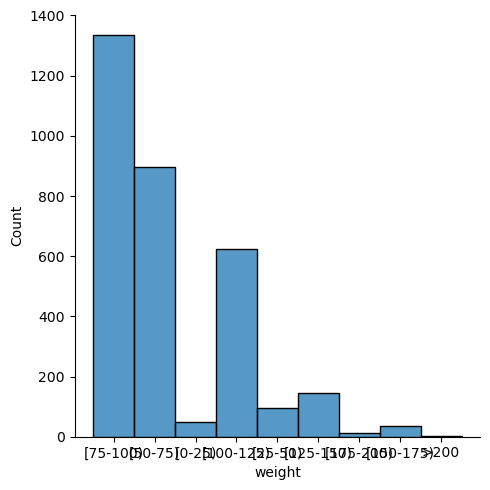

In [70]:
sns.displot(df1['weight'])

C:\Users\ShanR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='time_in_hospital'>

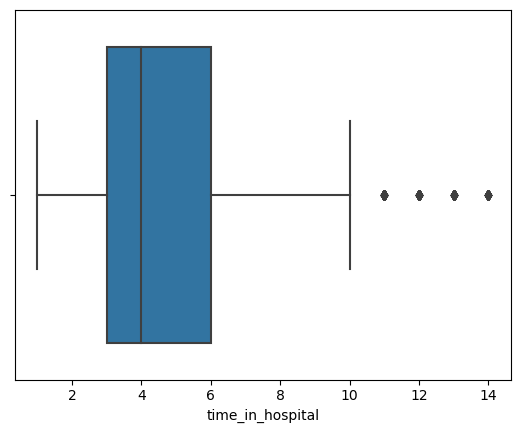

In [73]:
sns.displot(df1['time_in_hospital'])

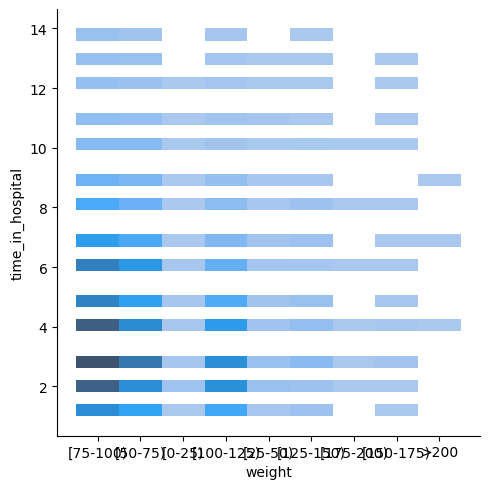

In [72]:
sns.displot(x=df1['weight'], y=df1['time_in_hospital'])

In [ ]:
#The above graph doesn't show any particular correlation between weight and time spent in the hospital.


<AxesSubplot:xlabel='weight', ylabel='time_in_hospital'>

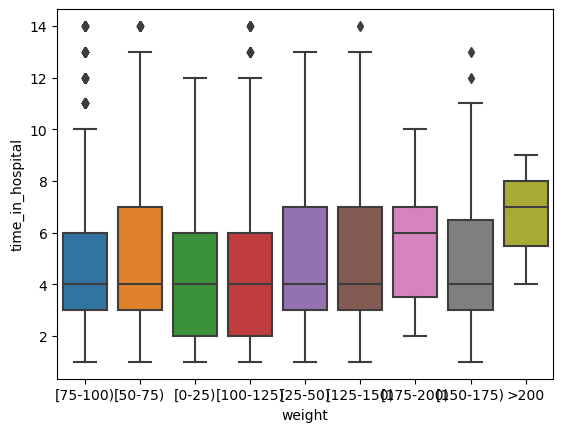

In [74]:
sns.boxplot(x=df1['weight'], y=df1['time_in_hospital'])

In [ ]:
#Unlike the previous graph, this chart shows a peron weighing over 200lbs is more likely to spend more time in the hospital with a majority of patients staying between 6 and 8 days. 

In [ ]:
#I also see I didn't make the sortby feature permananet. let's fix that.

In [76]:
df2 = df1.sort_values(["weight"])

In [ ]:
# Lets rerun the boxplot code:

<AxesSubplot:xlabel='weight', ylabel='time_in_hospital'>

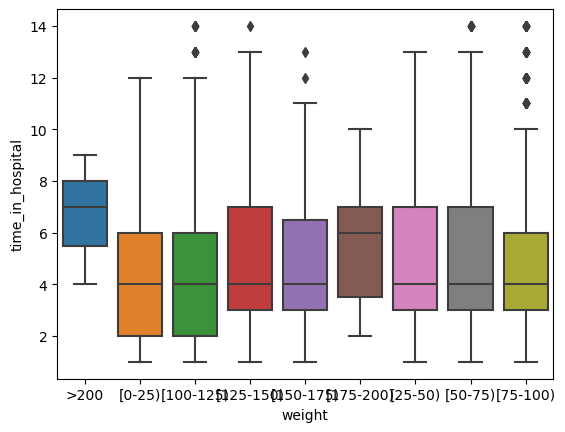

In [82]:
sns.boxplot(x=df2['weight'], y=df2['time_in_hospital'])

In [ ]:
Here there is a clear correlation that individuals weihing over 175lbs have the highest risk for longer stays in the hospital. 

In [ ]:
#Now, let's test to see if spliting "genders" will change our findings:

In [95]:
df3 = df2.loc[(df2.gender == 'Female')]
df3.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
9625,41656302,3021966,AfricanAmerican,Female,[30-40),>200,6,1,17,4,...,No,No,No,No,No,No,No,No,Yes,>30
75226,225201492,76776984,Caucasian,Female,[60-70),>200,1,1,7,7,...,No,Steady,No,No,No,No,No,No,Yes,>30
4446,25074408,85220019,Caucasian,Female,[60-70),[0-25),6,6,1,4,...,No,No,No,No,No,No,No,No,No,NO
2718,17477880,97769061,Caucasian,Female,[60-70),[0-25),6,6,17,5,...,No,Steady,No,No,No,No,No,Ch,Yes,>30
62157,173250816,72094464,Caucasian,Female,[70-80),[0-25),3,1,1,3,...,No,No,No,No,No,No,No,No,Yes,>30


<AxesSubplot:xlabel='weight', ylabel='time_in_hospital'>

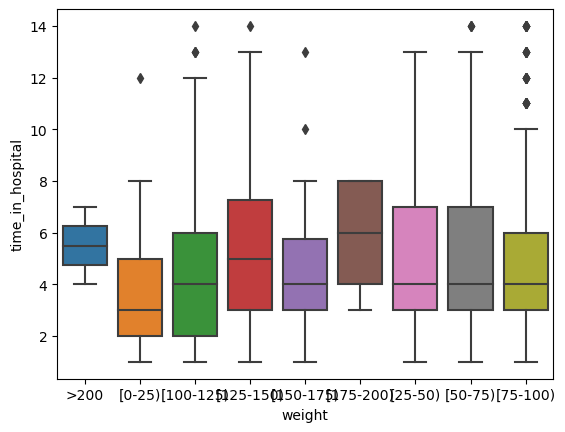

In [98]:
sns.boxplot(x=df3['weight'], y=df3['time_in_hospital'])

In [ ]:
#For females over 175lbs (see brown and blue boxes), there is a higher chance at being hospitalized as the medians are 5-6 dys, 

In [101]:
df4 = df2.loc[(df2.gender == 'Male')]
df4.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
90862,301878326,59836203,Caucasian,Male,[60-70),>200,1,3,7,9,...,No,No,No,No,No,No,No,Ch,Yes,>30
9318,40796664,63453591,Caucasian,Male,[80-90),[0-25),6,1,17,3,...,No,Steady,No,No,No,No,No,Ch,Yes,>30
6394,31793364,80722611,AfricanAmerican,Male,[40-50),[0-25),6,1,17,5,...,No,No,No,No,No,No,No,No,Yes,NO
2826,18066114,2477565,AfricanAmerican,Male,[30-40),[0-25),6,1,17,5,...,No,No,No,No,No,No,No,No,Yes,NO
94237,345552854,97074369,Caucasian,Male,[60-70),[0-25),3,6,1,11,...,No,No,No,No,No,No,No,Ch,Yes,>30


<AxesSubplot:xlabel='weight', ylabel='time_in_hospital'>

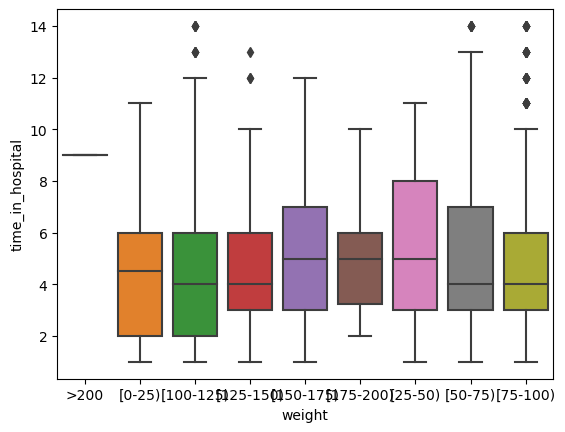

In [102]:
sns.boxplot(x=df4['weight'], y=df4['time_in_hospital'])

In [ ]:
#For males, it appears weight does not have a major/noticeable effect on stay in the hospital. the median is the same ranging 4-5 day stays.

In [ ]:
#Conclusion: For the scope of data provided, weight only impacts the length of stay in hospital for females. On the other hand a males weight doesn't effect his chances on a longer/shorter stay.

In [ ]:
#P.S. For fun let's see if comparisons could have been done without removing rows with "?"

<AxesSubplot:xlabel='weight', ylabel='time_in_hospital'>

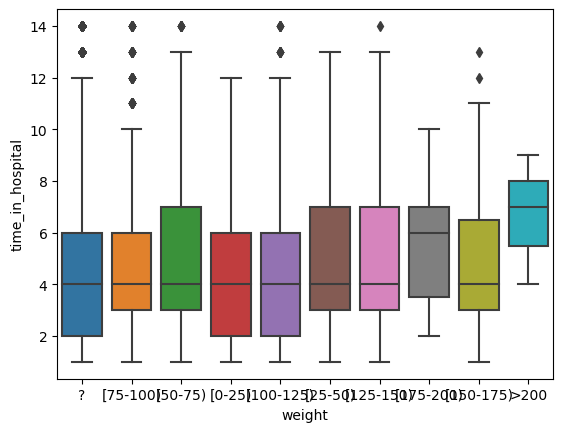

In [103]:
sns.boxplot(x=df['weight'], y=df['time_in_hospital'])

In [ ]:
# Answer: Yes. (head drops). I know, next time, time to plot BEFORE removing data.